In [6]:
import json
import matplotlib.pyplot as plt

In [7]:
minimal_prompt_log_file = open("logs/loopy_2023_08_27_02_50_01_processed/final_output_no_prune.json")
minimal_prompt_log = json.load(minimal_prompt_log_file)
minimal_prompt_log_file.close()

without_nudges_log_file = open("logs/loopy_2023_08_25_13_52_59_processed/final_output_no_prune.json")
without_nudges_log = json.load(without_nudges_log_file)
without_nudges_log_file.close()

with_nudges_log_file = open("logs/loopy_2023_08_25_13_54_09_processed/final_output_no_prune.json")
with_nudges_log = json.load(with_nudges_log_file)
with_nudges_log_file.close()

In [9]:
m_p = {i:0 for i in range(1, 15)}
wo_n = {i:0 for i in range(1, 15)}
w_n = {i:0 for i in range(1, 15)}

for i in minimal_prompt_log:
    m_p[i["k"]] = i["pass_at_k"]

for i in without_nudges_log:
    wo_n[i["k"]] = i["pass_at_k"]

for i in with_nudges_log:
    w_n[i["k"]] = i["pass_at_k"]

In [16]:
w_n.values()

dict_values([121.80000000000005, 157.80000000000015, 173.00000000000003, 182.70000000000002, 192.0000000000001, 196.70000000000007, 203.70000000000013, 209.29999999999998, 209.4, 217.0, 219.20000000000005, 223.9000000000001, 224.80000000000007, 226.70000000000005, 229.0])

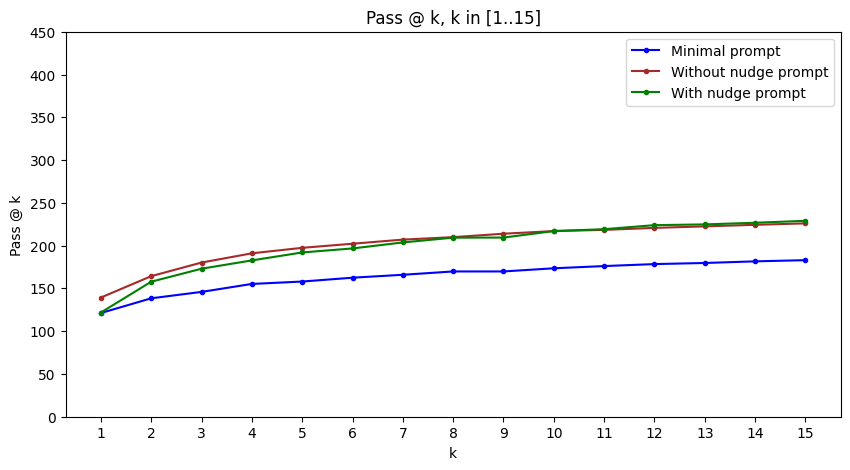

In [14]:
_ = plt.figure(figsize=(10, 5))
plt.plot(m_p.keys(), m_p.values(), '.-', color='blue', label='Minimal prompt')
plt.plot(wo_n.keys(), wo_n.values(), '.-', color='brown', label='Without nudge prompt')
plt.plot(w_n.keys(), w_n.values(), '.-', color='green', label='With nudge prompt')
plt.xticks(range(1, 16))
plt.ylim(0, 450)
plt.xlabel('k')
plt.ylabel('Pass @ k')
plt.legend()
plt.title('Pass @ k, k in [1..15]')
plt.savefig('pass_at_k_all.png')
plt.show()